<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Вывод-для-модели-job_satisfaction_rate:" data-toc-modified-id="Вывод-для-модели-job_satisfaction_rate:-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Вывод для модели job_satisfaction_rate:</a></span></li><li><span><a href="#Вывод-анализа-quit:" data-toc-modified-id="Вывод-анализа-quit:-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Вывод анализа quit:</a></span></li><li><span><a href="#Вывод-для-модели-quit:" data-toc-modified-id="Вывод-для-модели-quit:-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Вывод для модели quit:</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Проект ML для HR-аналитики компании «Работа с заботой»

## Описание проекта

**Цели проекта:**
1. Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика
2. Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.
3. Используя данные моделей сделать рекомендации для компании.

**Описание данных:**

Компания «Работа с заботой» предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1,

где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён;

`id` — уникальный идентификатор сотрудника;


`dept` — отдел, в котором работает сотрудник;


`level` — уровень занимаемой должности;


`workload` — уровень загруженности сотрудника;


`employment_years` — длительность работы в компании (в годах);


`last_year_promo` — показывает, было ли повышение за последний год;


`last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год;


`supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель;


`salary` — ежемесячная зарплата сотрудника;


`job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании, целевой признак.

## Загрузка данных

In [1]:
!pip install phik -q
!pip install -U scikit-learn -q
!pip install -U shap -q
# !pip install shap==0.40.0 -q

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import shap
import plotly.graph_objects as go

# # #графики в svg выглядят более четкими
# # %config InlineBackend.figure_format = 'svg'
# #увеличим дефолтный размер графиков
# from pylab import rcParams
# rcParams['figure.figsize'] = 8, 5

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем классы для подготовки данных
from sklearn.preprocessing import (
                                    OneHotEncoder,
                                    OrdinalEncoder,
                                    LabelEncoder,
                                    StandardScaler,
                                    MinMaxScaler,
                                    FunctionTransformer
                                )
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, make_scorer, mean_squared_error

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# загружаем Phik
from phik import phik_matrix
from phik.report import plot_correlation_matrix

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.dummy import DummyClassifier

# загружаем модули для анализа важности
from sklearn.inspection import permutation_importance

In [3]:
def get_df(link, sep=',', decimal='.', id_col='id'):

    response = requests.get(link)

    if response.status_code == 200:
        print('Файл доступен. Загружаем данные...')
        print('-' * 50)

        df = pd.read_csv(
          link,
          sep=sep,
          decimal=decimal,
          index_col=id_col)
    else:
        print(f'Ошибка: статус {response.status_code}. Проверьте URL.')

    display(df.info(), df.head())
    return df

In [4]:
train_job_satisfaction_rate = get_df('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv')

Файл доступен. Загружаем данные...
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 155278 to 338347
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   3994 non-null   object 
 1   level                  3996 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 312.5+ KB


None

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20


In [5]:
test_target_job_satisfaction_rate = get_df('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv')

Файл доступен. Загружаем данные...
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 130604 to 648995
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1)
memory usage: 31.2 KB


None

,job_satisfaction_rate
id,
130604,0.74
825977,0.75
418490,0.60
555320,0.72
826430,0.08


In [6]:
train_quit = get_df('https://code.s3.yandex.net/datasets/train_quit.csv')

Файл доступен. Загружаем данные...
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 723290 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   object
 1   level                  4000 non-null   object
 2   workload               4000 non-null   object
 3   employment_years       4000 non-null   int64 
 4   last_year_promo        4000 non-null   object
 5   last_year_violations   4000 non-null   object
 6   supervisor_evaluation  4000 non-null   int64 
 7   salary                 4000 non-null   int64 
 8   quit                   4000 non-null   object
dtypes: int64(3), object(6)
memory usage: 312.5+ KB


None

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no
257132,sales,junior,medium,2,no,yes,3,24000,yes
910140,marketing,junior,medium,2,no,no,5,25200,no


In [7]:
test_target_quit = get_df('https://code.s3.yandex.net/datasets/test_target_quit.csv')

Файл доступен. Загружаем данные...
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 999029 to 460332
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quit    2000 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


None

,quit
id,
999029,yes
372846,no
726767,no
490105,no
416898,yes


In [8]:
test_features = get_df('https://code.s3.yandex.net/datasets/test_features.csv')

Файл доступен. Загружаем данные...
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB


None

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000
467458,sales,middle,low,5,no,no,4,19200
418655,sales,middle,low,6,no,no,4,19200
789145,hr,middle,medium,5,no,no,5,40800


## Предобработка данных

In [9]:
def prepro_df(df):
    summary = pd.DataFrame({
        "NaN": df.isna().sum(),
        "Тип данных": df.dtypes,
    })

    summary["NaN"] = (summary["NaN"])

    print(f"📈 Размер таблицы: {df.shape}")
    print(f"📌 Дубликатов строк (с ID): {df.reset_index().duplicated().sum()}") #
    print(f"📌 Дубликатов строк (без ID): {df.duplicated().sum()}") #.reset_index()

    display(summary.T)
    print("-"*150  + "\n🎯 Пример строки из таблицы:")
    display(df.sample(1))

In [10]:
prepro_df(train_job_satisfaction_rate)

📈 Размер таблицы: (4000, 9)
📌 Дубликатов строк (с ID): 0
📌 Дубликатов строк (без ID): 245


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
NaN,6,4,0,0,0,0,0,0,0
Тип данных,object,object,object,int64,object,object,int64,int64,float64


------------------------------------------------------------------------------------------------------------------------------------------------------
🎯 Пример строки из таблицы:


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
291258,sales,junior,medium,1,no,no,5,25200,0.7


In [11]:
(train_job_satisfaction_rate
 .loc[train_job_satisfaction_rate.duplicated(keep=False)]
 .sort_values(by=['salary', 'job_satisfaction_rate'])
 .head(10))

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
697290,sales,junior,low,1,no,yes,3,12000,0.09
732263,sales,junior,low,1,no,yes,3,12000,0.09
997545,sales,junior,low,1,no,no,3,12000,0.18
827521,sales,junior,low,1,no,no,3,12000,0.18
293229,sales,junior,low,1,no,no,3,12000,0.18
440121,sales,junior,low,1,no,no,3,12000,0.18
872278,sales,junior,low,1,no,no,3,12000,0.22
616546,sales,junior,low,1,no,no,3,12000,0.22
754215,sales,junior,low,3,no,no,3,12000,0.27


In [12]:
prepro_df(test_target_job_satisfaction_rate)

📈 Размер таблицы: (2000, 1)
📌 Дубликатов строк (с ID): 0
📌 Дубликатов строк (без ID): 1902


,job_satisfaction_rate
NaN,0
Тип данных,float64


------------------------------------------------------------------------------------------------------------------------------------------------------
🎯 Пример строки из таблицы:


,job_satisfaction_rate
id,
906310,0.68


In [13]:
prepro_df(train_quit)

📈 Размер таблицы: (4000, 9)
📌 Дубликатов строк (с ID): 0
📌 Дубликатов строк (без ID): 1413


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
NaN,0,0,0,0,0,0,0,0,0
Тип данных,object,object,object,int64,object,object,int64,int64,object


------------------------------------------------------------------------------------------------------------------------------------------------------
🎯 Пример строки из таблицы:


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
144283,marketing,junior,low,1,no,no,4,16800,yes


In [14]:
prepro_df(test_target_quit)

📈 Размер таблицы: (2000, 1)
📌 Дубликатов строк (с ID): 0
📌 Дубликатов строк (без ID): 1998


,quit
NaN,0
Тип данных,object


------------------------------------------------------------------------------------------------------------------------------------------------------
🎯 Пример строки из таблицы:


,quit
id,
302352,no


In [15]:
prepro_df(test_features)

📈 Размер таблицы: (2000, 8)
📌 Дубликатов строк (с ID): 0
📌 Дубликатов строк (без ID): 557


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
NaN,2,1,0,0,0,0,0,0
Тип данных,object,object,object,int64,object,object,int64,int64


------------------------------------------------------------------------------------------------------------------------------------------------------
🎯 Пример строки из таблицы:


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
207456,hr,junior,medium,1,no,yes,4,30000


### Вывод:
* Данные, полученные от компании, достаточно чисто сформированы.

* Присутствуют некоторое количество пропусков, которые будут заполняться в пайплайне.

* Явных дубликатов нет.

* Типы данных соответствуют значениям.

## Исследовательский анализ данных

In [16]:
def get_eda(df):

    for col in df.select_dtypes(include='object').columns.to_list():

        display(df[col].value_counts())

        plt.figure(figsize=(10, 5))
        ax = sns.countplot(x=col, data=df)
        plt.title(f'Распределение признака {col}')
        plt.xlabel(col)
        plt.ylabel('Количество')

        for p in ax.patches:
            height = p.get_height()
            percent = 100 * height / len(df)
            ax.annotate(f'{percent:.1f}%',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10)


        plt.xticks(rotation=30, ha='right')
        plt.tight_layout()
        plt.show()

    num_col = df.select_dtypes(exclude='object').columns.to_list()
    if num_col:
        display(df[num_col].describe().T)

    for col in num_col:

        if df[col].nunique() <= 20:
            plt.figure(figsize=(10, 5))
            ax = sns.countplot(x=col, data=df)
            plt.title(f'Распределение признака {col}')
            plt.xlabel(col)
            plt.ylabel('Количество')

            for p in ax.patches:
                height = p.get_height()
                percent = 100 * height / len(df)
                ax.annotate(f'{percent:.1f}%',
                          (p.get_x() + p.get_width() / 2., height),
                          ha='center', va='bottom', fontsize=10)
            plt.show()

        else:
            plt.figure(figsize=(10, 5))
            plt.subplot(2, 1, 1)
            sns.histplot(data=df, x=col, kde=True, bins=30)
            plt.title(f'Распределение {col}')
            plt.xlabel('Значения')
            plt.ylabel('Частота')
            plt.grid(True)

            plt.subplot(2, 1, 2)
            sns.boxplot(data=df, x=col, orient='h')
            plt.title(f"Boxplot: {col}")
            plt.xlabel('Значения')
            plt.grid(True)

            plt.tight_layout(pad=2.0)
            plt.show()

sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64

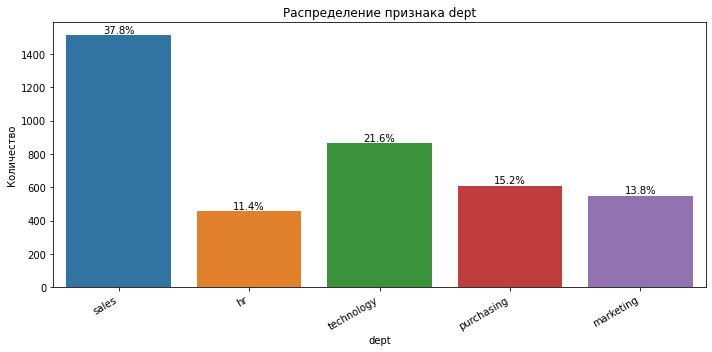

junior    1894
middle    1744
sinior     358
Name: level, dtype: int64

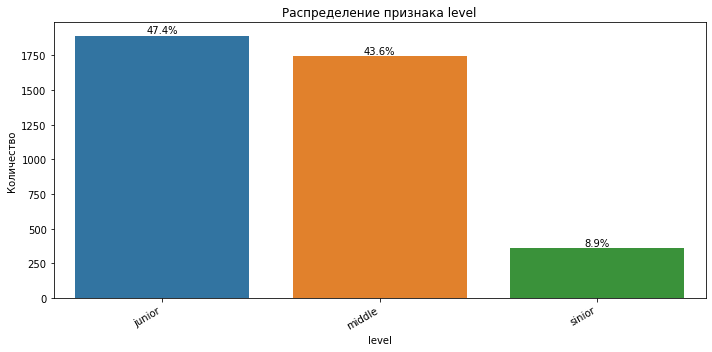

medium    2066
low       1200
high       734
Name: workload, dtype: int64

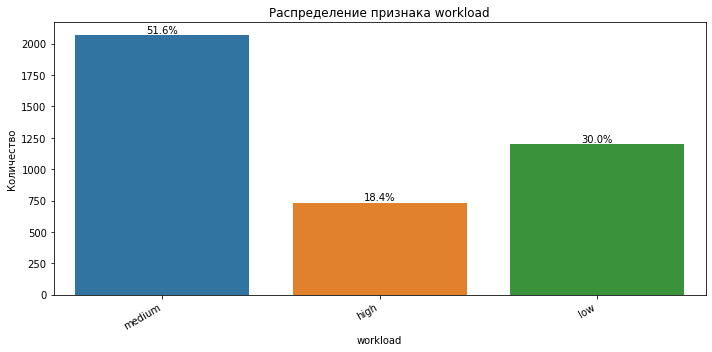

no     3880
yes     120
Name: last_year_promo, dtype: int64

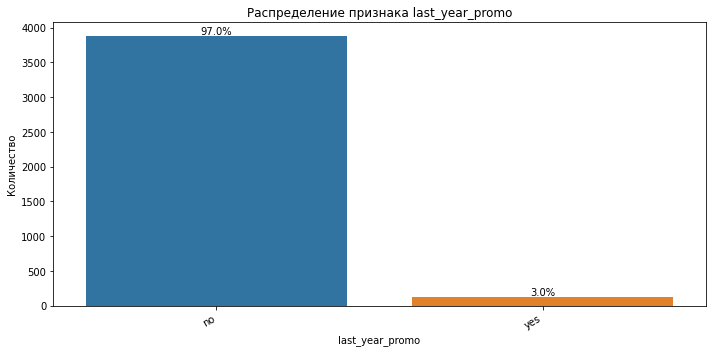

no     3441
yes     559
Name: last_year_violations, dtype: int64

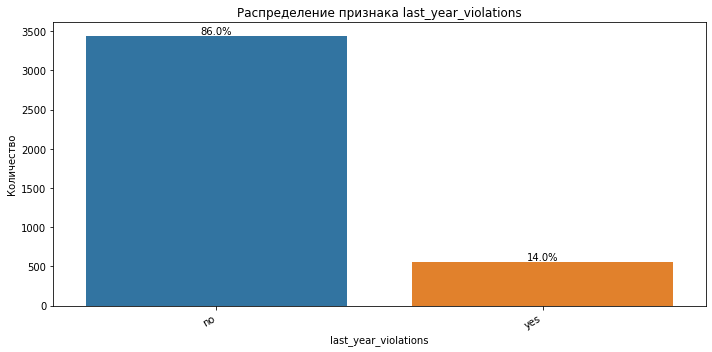

,count,mean,std,min,25%,50%,75%,max
employment_years,4000.0,3.718500,2.542513,1.00,2.00,3.00,6.00,10.0
supervisor_evaluation,4000.0,3.476500,1.008812,1.00,3.00,4.00,4.00,5.0
salary,4000.0,33926.700000,14900.703838,12000.00,22800.00,30000.00,43200.00,98400.0
job_satisfaction_rate,4000.0,0.533995,0.225327,0.03,0.36,0.56,0.71,1.0


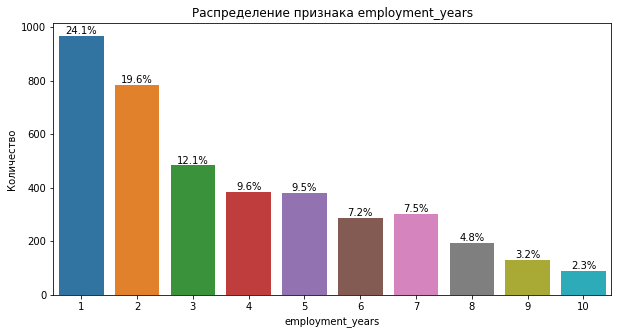

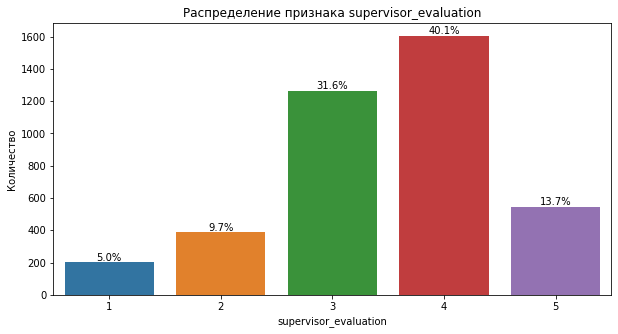

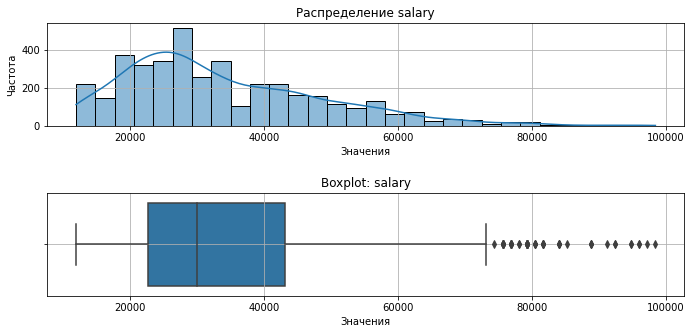

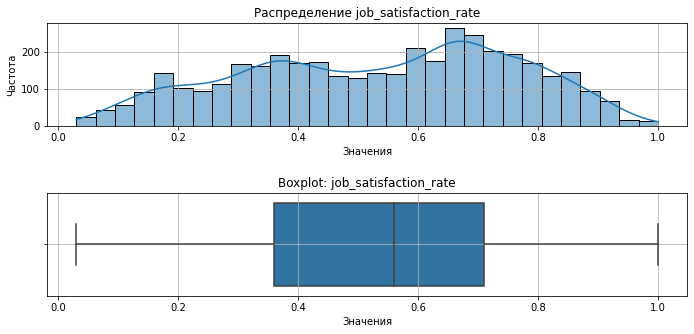

In [17]:
get_eda(train_job_satisfaction_rate)

,count,mean,std,min,25%,50%,75%,max
job_satisfaction_rate,2000.0,0.54878,0.22011,0.03,0.38,0.58,0.72,1.0


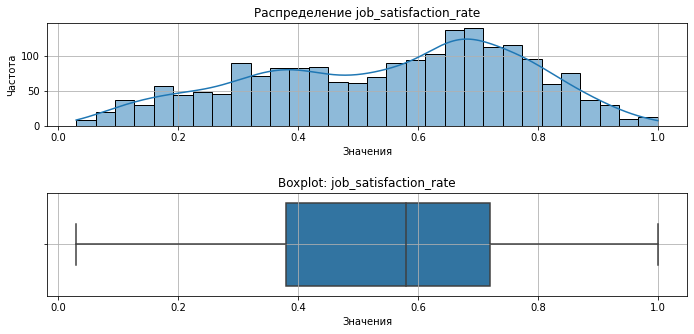

In [18]:
get_eda(test_target_job_satisfaction_rate)

sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: dept, dtype: int64

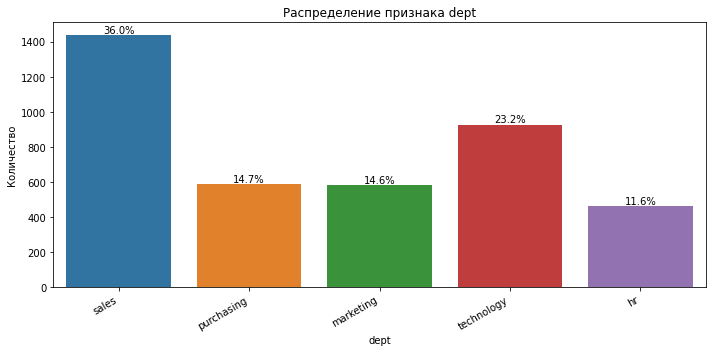

junior    1949
middle    1694
sinior     357
Name: level, dtype: int64

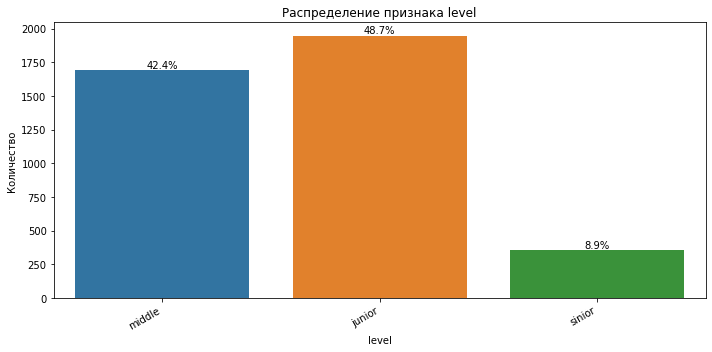

medium    2118
low       1208
high       674
Name: workload, dtype: int64

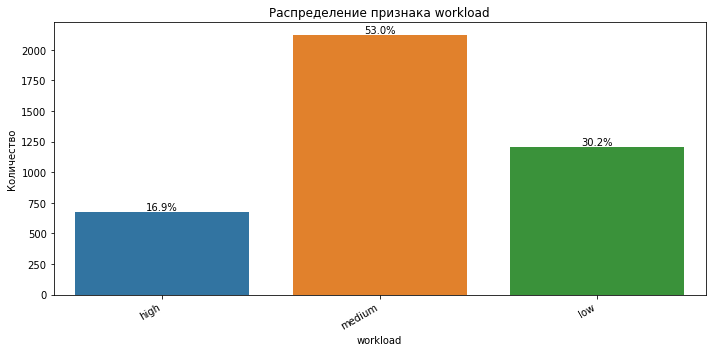

no     3887
yes     113
Name: last_year_promo, dtype: int64

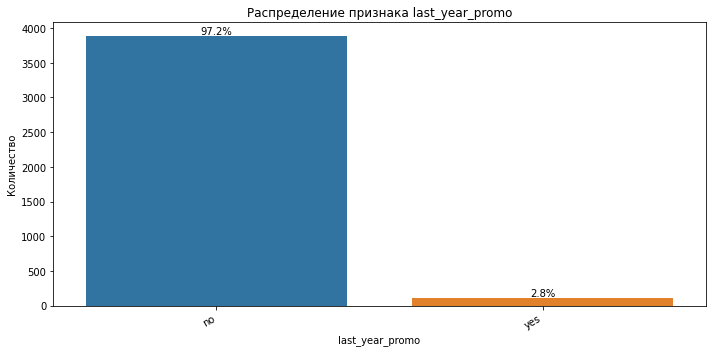

no     3455
yes     545
Name: last_year_violations, dtype: int64

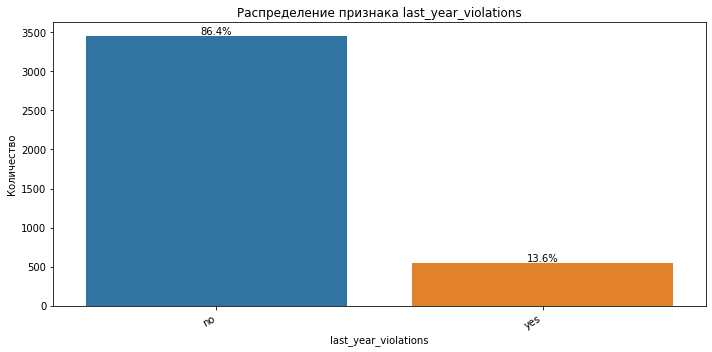

no     2872
yes    1128
Name: quit, dtype: int64

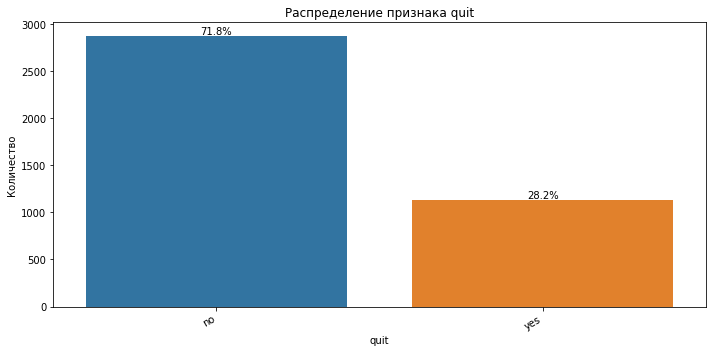

,count,mean,std,min,25%,50%,75%,max
employment_years,4000.0,3.70150,2.541852,1.0,2.0,3.0,6.0,10.0
supervisor_evaluation,4000.0,3.47475,1.004049,1.0,3.0,4.0,4.0,5.0
salary,4000.0,33805.80000,15152.415163,12000.0,22800.0,30000.0,43200.0,96000.0


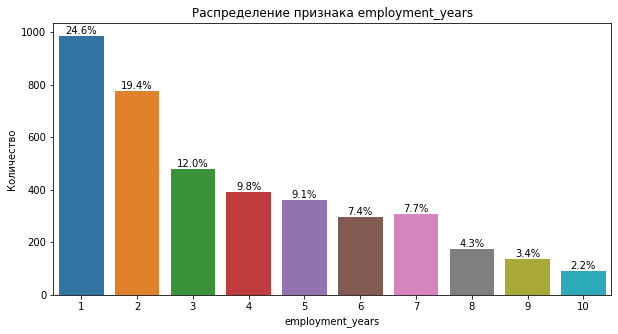

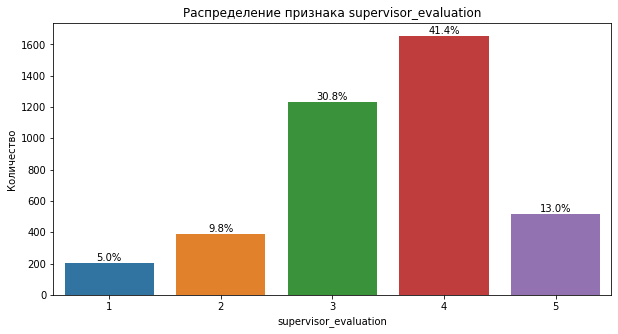

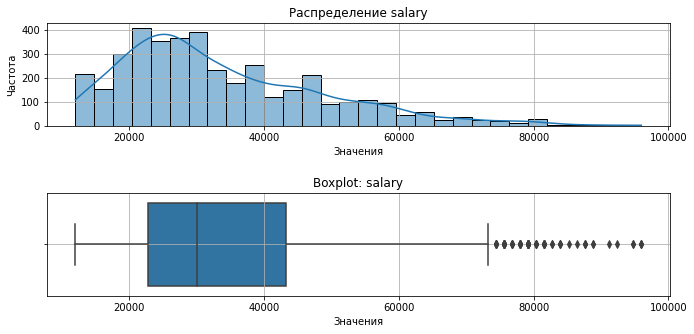

In [19]:
get_eda(train_quit)

no     1436
yes     564
Name: quit, dtype: int64

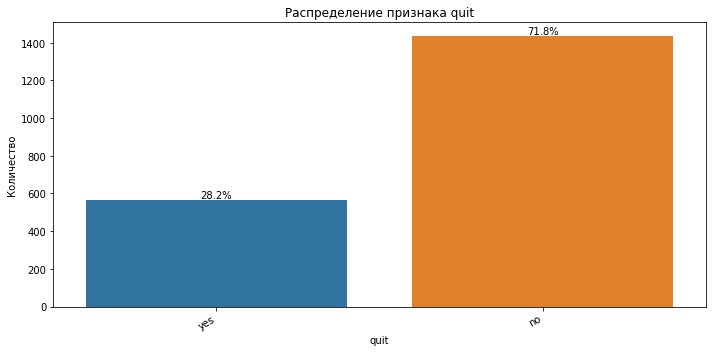

In [20]:
get_eda(test_target_quit)

In [21]:
test_features['workload'].value_counts()

medium    1043
low        593
high       363
             1
Name: workload, dtype: int64

In [22]:
test_features.isna().sum()

dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

sales         763
technology    455
marketing     279
purchasing    273
hr            227
                1
Name: dept, dtype: int64

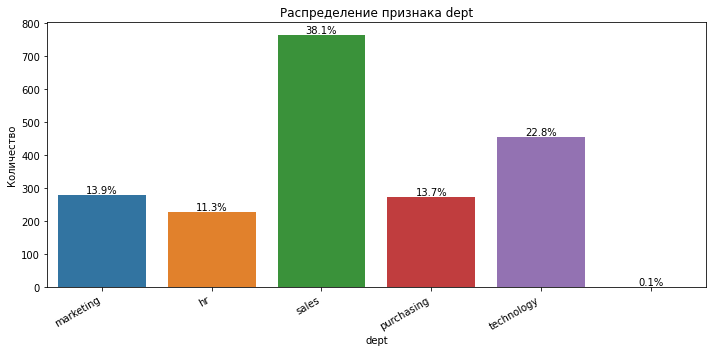

junior    974
middle    854
sinior    171
Name: level, dtype: int64

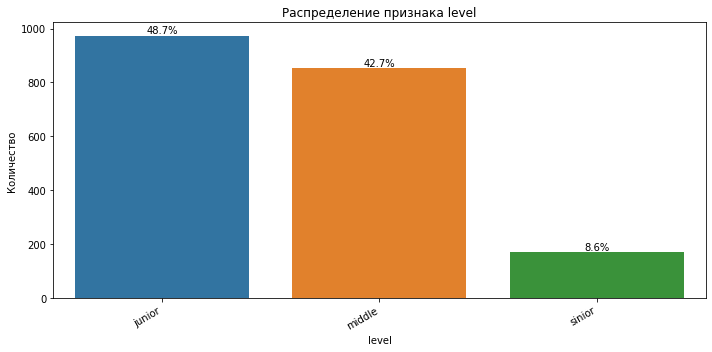

medium    1043
low        593
high       363
             1
Name: workload, dtype: int64

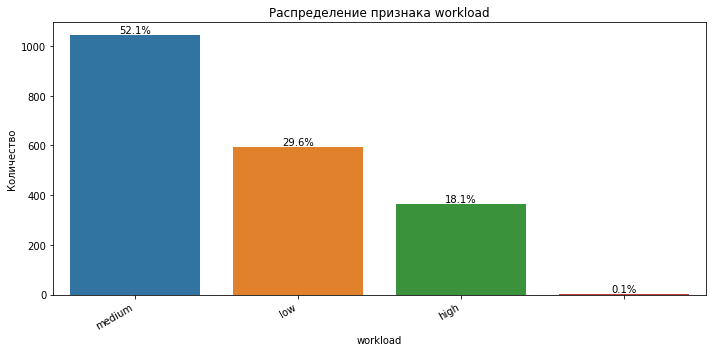

no     1937
yes      63
Name: last_year_promo, dtype: int64

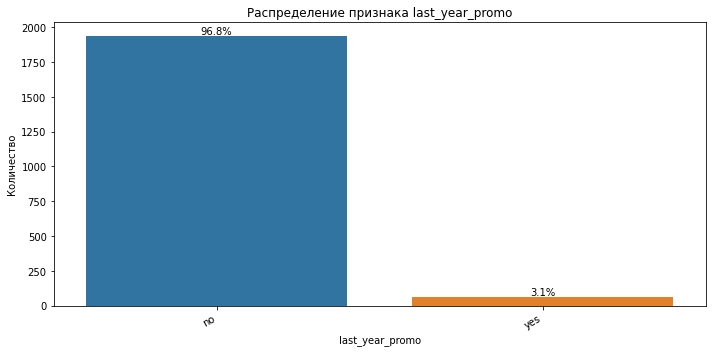

no     1738
yes     262
Name: last_year_violations, dtype: int64

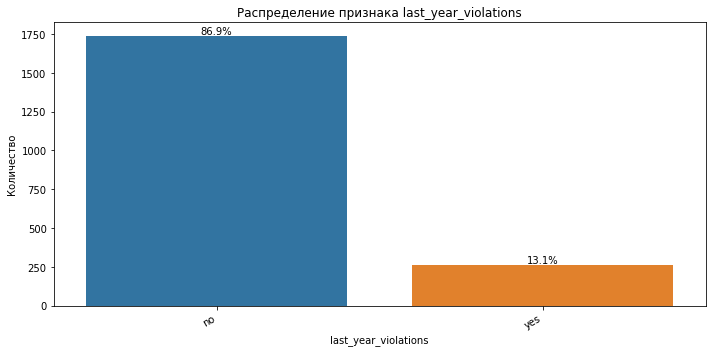

,count,mean,std,min,25%,50%,75%,max
employment_years,2000.0,3.6665,2.537222,1.0,1.0,3.0,6.0,10.0
supervisor_evaluation,2000.0,3.5265,0.996892,1.0,3.0,4.0,4.0,5.0
salary,2000.0,34066.8000,15398.436729,12000.0,22800.0,30000.0,43200.0,96000.0


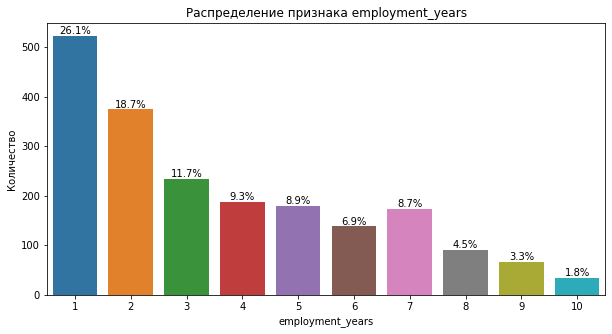

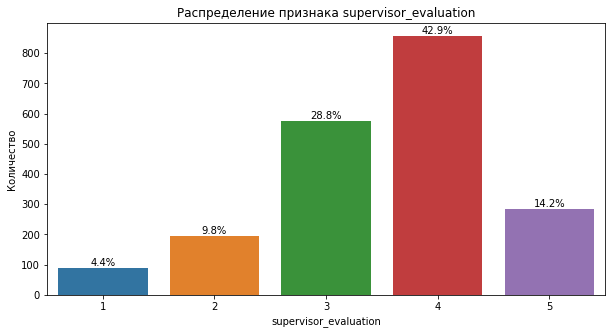

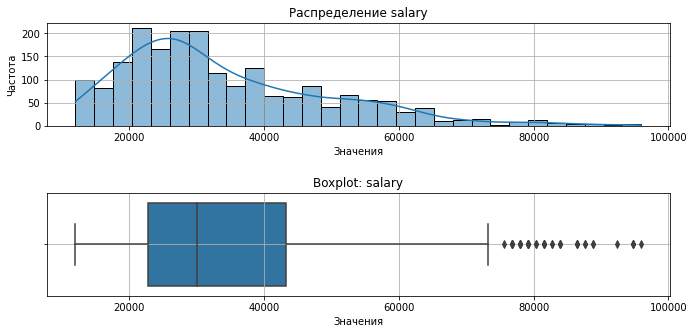

In [23]:
get_eda(test_features)

In [24]:
def get_phik(df):
    interval_cols = [
    col for col in df.columns if df[col].nunique() > 20 and pd.api.types.is_numeric_dtype(df[col])
    ]
    print(interval_cols)
    correlation_matrix = df.phik_matrix(interval_cols=interval_cols)

    plot_correlation_matrix(correlation_matrix.values,
                          x_labels=correlation_matrix.columns,
                          y_labels=correlation_matrix.index,
                          vmin=0, vmax=1, color_map='Greens',
                          title=r'correlation $\phi_K$',
                          figsize=(10, 7))
    plt.show()

['salary', 'job_satisfaction_rate']


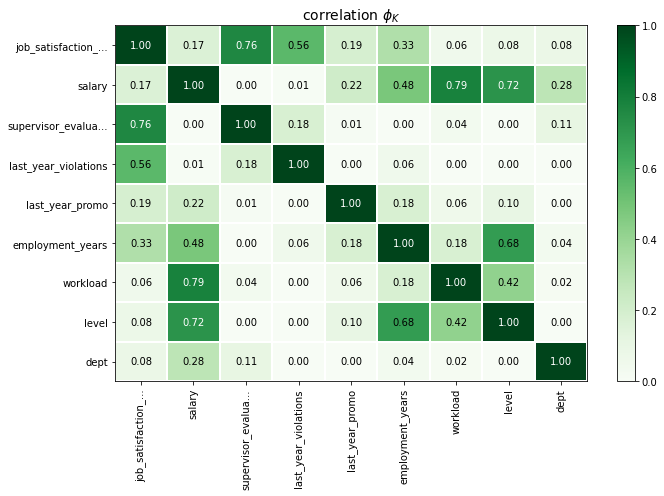

In [25]:
get_phik(train_job_satisfaction_rate)

['salary']


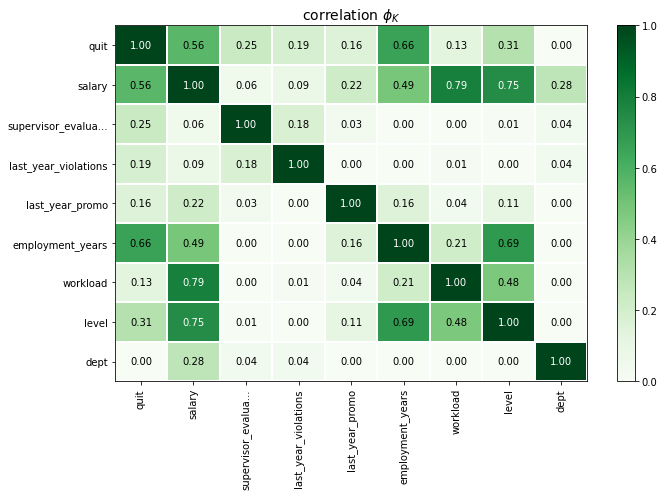

In [26]:
get_phik(train_quit)

In [27]:
# собирем тестовую выборку
test_jsrate = test_features.join(test_target_job_satisfaction_rate)
print(test_jsrate.shape)
display(test_jsrate.isna().sum())

test_quit = test_features.join(test_target_quit)
print(test_quit.shape)
test_quit.isna().sum()

(2000, 9)


dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

(2000, 9)


dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

### Вывод:
* Исследовательский анализ:

  * Выбросов и аномалий, мешающих анализу, отсутствуют;

* Корреляционный анализ:

  * Мультиколлинеарности между признаками не обнаружено;

  * Есть сильная зависимость между salary, level и workload (можно совместить эти признаки);

  * С таргетом есть умеренная корреляция с last_years_violations и supervisor_evaluation;

  * С таргетом есть слабая корреляция с salary, last_years_violations и employment_years;

  * С таргетом практически отсутствует корреляция с level, dept и workload.

## Подготовка данных

In [28]:
RANDOM_STATE = 18
TEST_SIZE = 0.25


train_jsrate = train_job_satisfaction_rate.copy()

X_train = train_jsrate.drop(['job_satisfaction_rate'], axis=1)
y_train = train_jsrate['job_satisfaction_rate']

X_train.shape, y_train.shape

((4000, 8), (4000,))

In [29]:
# создаём списки с названиями признаков
ohe_columns = ['dept']

ord_columns = ['level', 'workload', 'last_year_promo', 'last_year_violations']

num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

In [30]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

In [31]:
# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [
        
        ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high'],
                    ['no', 'yes'],
                    ['yes', 'no']
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
        )),
        ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [32]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ],
    remainder='passthrough')



### Вывод:
Создана база пайплайна для предобработки

## Обучение моделей

Для первой задачи будем использовать метрику SMAPE (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»).

Критерий успеха: SMAPE ≤ 15 на тестовой выборке.

In [33]:
# создадим метрику SMAPE
def smape(y_true, y_pred):

    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    smape = np.abs(y_true - y_pred) / denominator
    smape[denominator == 0] = 0
    return np.mean(smape) * 100

smape_scorer = make_scorer(smape, greater_is_better=False)

In [34]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

In [35]:
param_grid = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 20),
        'models__min_samples_split': range(2, 10),
        'models__min_samples_leaf': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [KNeighborsRegressor()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [SVR()],
        'models__C': [0.1, 1, 10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [36]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring=smape_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=50
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('SMAPE лучшей модели на кросс-валидации:', abs(randomized_search.best_score_)) # для метрики меньше лучше выдает '-'

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                           

In [37]:
result = permutation_importance(randomized_search.best_estimator_, X_train, y_train, scoring=smape_scorer)
result

{'importances_mean': array([ 6.94156991, 10.74067565,  6.06239628, 15.01640877,  0.78745464,
         7.50418521, 28.70808919, 13.49312276]),
 'importances_std': array([0.14992402, 0.19256032, 0.1550839 , 0.3308812 , 0.04615084,
        0.16922214, 0.4191032 , 0.15017068]),
 'importances': array([[ 7.12623876,  6.82393241,  6.71744482,  7.05072405,  6.9895095 ],
        [10.52096717, 11.06051009, 10.82091433, 10.72836356, 10.57262309],
        [ 6.26786262,  5.88039202,  6.13832951,  6.14348002,  5.88191722],
        [15.3653019 , 14.6837273 , 15.16669848, 14.55995565, 15.30636051],
        [ 0.76351511,  0.8708625 ,  0.77410781,  0.79503533,  0.73375246],
        [ 7.66008046,  7.57589127,  7.23829217,  7.66876723,  7.37789494],
        [28.64025454, 28.28809737, 28.58903562, 28.51207084, 29.5109876 ],
        [13.29473874, 13.6922653 , 13.37785675, 13.63374305, 13.46700994]])}

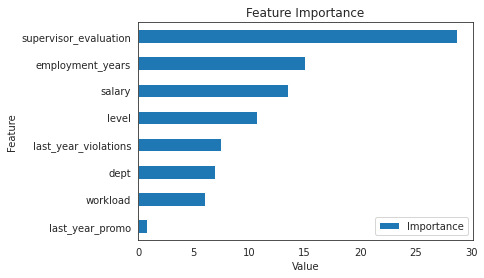

In [38]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': result['importances_mean']})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh')

plt.title('Feature Importance')
plt.xlabel('Value')
plt.show()

In [39]:
df_train = train_jsrate.drop(['last_year_promo'], axis=1)
df_train.columns

Index(['dept', 'level', 'workload', 'employment_years', 'last_year_violations',
       'supervisor_evaluation', 'salary', 'job_satisfaction_rate'],
      dtype='object')

In [40]:
# Устанавливаем опцию отображения
pd.set_option('display.max_colwidth', None)

In [41]:
X_train = df_train.drop(['job_satisfaction_rate'], axis=1)
y_train = df_train['job_satisfaction_rate']

# создаём списки с названиями признаков
ohe_columns = ['dept']
ord_columns = ['level', 'workload', 'last_year_violations']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ])

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high'],
                    ['yes', 'no']
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ],
    remainder='passthrough')

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

param_grid = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 20),
        'models__min_samples_split': range(2, 10),
        'models__min_samples_leaf': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
    ,
    {
        'models': [KNeighborsRegressor()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
    ,
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
    ,
    {
        'models': [SVR()],
        'models__C': [0.1, 1, 10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring=smape_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=50
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('SMAPE лучшей модели на кросс-валидации:', abs(randomized_search.best_score_)) # для метрики меньше лучше выдает '-'

# рассчитайем прогноз на тренировочных данных
y_train_pred = randomized_search.predict(X_train)
smape_sc_train = smape(y_train, y_train_pred)
print(f'SMAPE на тренировочной выборке: {smape_sc_train}')
print("MSE на тренировочной выборке:", mean_squared_error(y_train, y_train_pred))

# пересобрал выборку
X_test = test_jsrate.drop(['job_satisfaction_rate'], axis=1)
y_test = test_jsrate['job_satisfaction_rate']

# проверим работу модели на тестовой выборке
# рассчитайем прогноз на тестовых данных
y_test_pred = randomized_search.predict(X_test)
smape_sc = smape(y_test, y_test_pred)
print(f'SMAPE на тестовой выборке: {smape_sc}')
print("MSE на тестовой выборке:", mean_squared_error(y_test, y_test_pred))

# Извлекаем результаты кросс-валидации
cv_results = pd.DataFrame(randomized_search.cv_results_)

# Сортируем по метрике
top_10 = cv_results.sort_values(by='mean_test_score', ascending=False).head(10)

# Отображаем только нужные колонки для анализа
cols_to_show = ['rank_test_score', 'mean_test_score', 'std_test_score', 'params']
display(top_10[cols_to_show])

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                           

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,rank_test_score,mean_test_score,std_test_score,params
21,1,-14.793490,0.567372,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 3, 'models__min_samples_leaf': 3, 'models__max_depth': 19, 'models': DecisionTreeRegressor(random_state=18)}"
45,2,-14.806783,0.578583,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 2, 'models__min_samples_leaf': 3, 'models__max_depth': 15, 'models': DecisionTreeRegressor(random_state=18)}"
40,3,-14.836796,0.552123,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 4, 'models__min_samples_leaf': 3, 'models__max_depth': 12, 'models': DecisionTreeRegressor(random_state=18)}"
44,4,-14.938258,0.657090,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 9, 'models__min_samples_leaf': 3, 'models__max_depth': 16, 'models': DecisionTreeRegressor(random_state=18)}"
32,5,-15.103092,0.503944,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 3, 'models__min_samples_leaf': 4, 'models__max_depth': 19, 'models': DecisionTreeRegressor(random_state=18)}"
3,5,-15.103092,0.503944,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 5, 'models__min_samples_leaf': 4, 'models__max_depth': 19, 'models': DecisionTreeRegressor(random_state=18)}"
31,7,-15.106877,0.719303,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 8, 'models__min_samples_leaf': 2, 'models__max_depth': 13, 'models': DecisionTreeRegressor(random_state=18)}"
48,8,-15.126962,0.481465,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 4, 'models__min_samples_leaf': 4, 'models__max_depth': 15, 'models': DecisionTreeRegressor(random_state=18)}"
5,9,-15.128306,0.486258,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 2, 'models__min_samples_leaf': 4, 'models__max_depth': 14, 'models': DecisionTreeRegressor(random_state=18)}"
16,10,-15.147755,0.580376,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 7, 'models__min_samples_leaf': 2, 'models__max_depth': 17, 'models': DecisionTreeRegressor(random_state=18)}"


### Вывод для модели job_satisfaction_rate:
Лучшая модель `DecisionTreeRegressor`(`max_depth=19`, `min_samples_leaf=3`, `min_samples_split=3`, `random_state=18`)
                                       
SMAPE лучшей модели на кросс-валидации: `14.79`

SMAPE на тренировочной выборке: `9.68`

SMAPE на тестовой выборке: `13.87`

Метрика удовлетворяет условию проекта "SMAPE ≤ 15 на тестовой выборке".
* С одним уточнением метрика значительно лучше на тренировочных данных, что может символизировать об переобучении.

Почему именно эта модель лучшая?
* Оптимальная глубина и настройки узлов обеспечивают гибкость модели без сильного переобучения.

* Низкое стандартное отклонение (std_test_score = 0.57) говорит о стабильности модели на разных фолдах.


Модель `DecisionTreeRegressor` с `max_depth=19` показала наилучшее качество. Успех обеспечен за счёт удачного сочетания предобработки числовых признаков, глубокой структуры дерева и гибких настроек разбиений. Это позволило модели точно улавливать зависимости и при этом сохранять стабильность.




Распределение уволившихся по отделам

dept
technology    0.297414
sales         0.283032
purchasing    0.282313
marketing     0.280069
hr            0.250000
Name: quit, dtype: float64


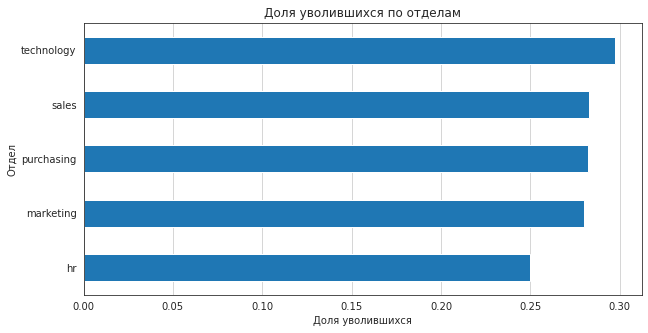


Распределение уволившихся по загруженности

workload
low       0.429636
medium    0.230406
high      0.179525
Name: quit, dtype: float64


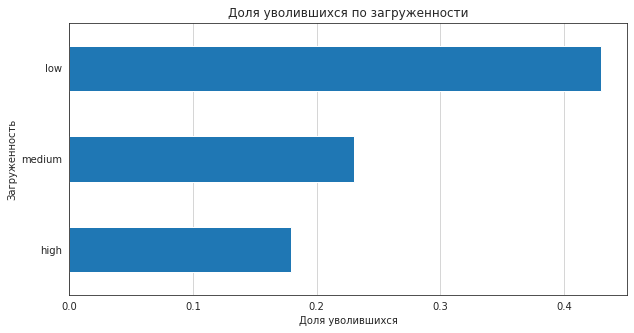


Распределение уволившихся по уровню


level
junior    0.514623
middle    0.063754
sinior    0.047619
Name: quit, dtype: float64

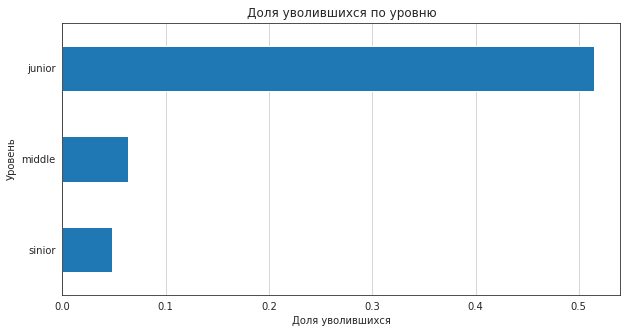

In [42]:
quit_eda = train_quit.copy()
quit_eda['quit'] = quit_eda['quit'].replace({'yes': 1, 'no': 0})

# Распределение уволившихся по отделам
dept_quit_ratio = quit_eda.groupby('dept')['quit'].mean().sort_values(ascending=False)
print('\nРаспределение уволившихся по отделам\n')
print(dept_quit_ratio)

plt.figure(figsize=(10, 5))
dept_quit_ratio.plot(kind='barh')
plt.title('Доля уволившихся по отделам')
plt.xlabel('Доля уволившихся')
plt.ylabel('Отдел')
plt.grid(True, axis='x')
plt.gca().invert_yaxis()  # чтобы самый высокий был сверху
plt.show()

# Распределение уволившихся по загруженности
workload_quit_ratio = quit_eda.groupby('workload')['quit'].mean().sort_values(ascending=False)
print('\nРаспределение уволившихся по загруженности\n')
print(workload_quit_ratio)

plt.figure(figsize=(10, 5))
workload_quit_ratio.plot(kind='barh')
plt.title('Доля уволившихся по загруженности')
plt.xlabel('Доля уволившихся')
plt.ylabel('Загруженность')
plt.grid(True, axis='x')
plt.gca().invert_yaxis()
plt.show()

# Распределение уволившихся по уровню
level_quit_ratio = quit_eda.groupby('level')['quit'].mean().sort_values(ascending=False)
print('\nРаспределение уволившихся по уровню')
display(level_quit_ratio)

plt.figure(figsize=(10, 5))
level_quit_ratio.plot(kind='barh')
plt.title('Доля уволившихся по уровню')
plt.xlabel('Доля уволившихся')
plt.ylabel('Уровень')
plt.grid(True, axis='x')
plt.gca().invert_yaxis()
plt.show()

quit
no     37702.228412
yes    23885.106383
Name: salary, dtype: float64


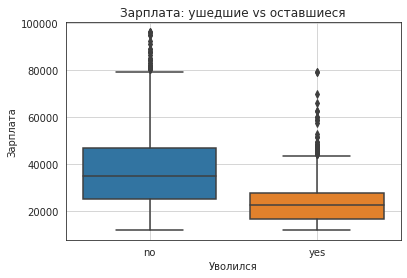

In [43]:
# Средняя зарплата ушедших и оставшихся
salary_comparison = train_quit.groupby('quit')['salary'].mean()
print(salary_comparison)

# Можно и через boxplot:
sns.boxplot(data=train_quit, x='quit', y='salary')
plt.title('Зарплата: ушедшие vs оставшиеся')
plt.xlabel('Уволился')
plt.ylabel('Зарплата')
plt.grid(True)
plt.show()

In [44]:
df_hist_test_test = test_target_quit.copy()
df_hist_test_test = df_hist_test_test.join(test_target_job_satisfaction_rate)
df_hist_test_test.head()

,quit,job_satisfaction_rate
id,,
999029,yes,0.35
372846,no,0.21
726767,no,0.73
490105,no,0.62
416898,yes,0.57


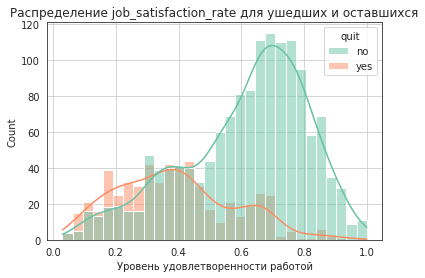

In [45]:
# Гистограммы наложением
sns.histplot(
    data=df_hist_test_test,
    x='job_satisfaction_rate',
    hue='quit',
    hue_order=['no', 'yes'],
    kde=True,
    palette='Set2',
    bins=30
)
plt.title('Распределение job_satisfaction_rate для ушедших и оставшихся')
plt.xlabel('Уровень удовлетворенности работой')
plt.grid(True)
plt.show()

In [46]:
train_quit['job_satisfaction_rate'] = randomized_search.predict(train_quit)
train_quit.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no,0.618000
814010,sales,junior,medium,2,no,no,4,27600,no,0.821905
155091,purchasing,middle,medium,5,no,no,1,37200,no,0.416667
257132,sales,junior,medium,2,no,yes,3,24000,yes,0.350000
910140,marketing,junior,medium,2,no,no,5,25200,no,0.812500


In [47]:
test_quit['job_satisfaction_rate'] = randomized_search.predict(test_quit)
test_quit.head()

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,no,0.883333
686555,hr,junior,medium,1,no,no,4,30000,no,0.682222
467458,sales,middle,low,5,no,no,4,19200,no,0.683750
418655,sales,middle,low,6,no,no,4,19200,no,0.713333
789145,hr,middle,medium,5,no,no,5,40800,no,0.826667


### Вывод анализа quit:
* Сотрудники уровня junior увольняются значительно чаще — в 51% случаев, в то время как для middle и senior уровней эта доля составляет лишь около 6% и 5% соответственно.

* По уровню загруженности чаще увольняются сотрудники с низкой загруженностью (43%), что может указывать на отсутствие вовлечённости.

* процент увольнений по отделам примерно одинаковый.
    * Наибольший процент наблюдается в отделах technology (30%).
    * Наименьший процент наблюдается в отделах hr (25%).

* Средняя зарплата уволившихся сотрудников составляет 23 885, что ниже средней зарплаты оставшихся сотрудников — 37 702. Это может свидетельствовать о связи между уровнем зарплаты и решением уйти из компании.

* **Утверждение**, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник, **потверждается**.

In [48]:
train_quit.columns

Index(['dept', 'level', 'workload', 'employment_years', 'last_year_promo',
       'last_year_violations', 'supervisor_evaluation', 'salary', 'quit',
       'job_satisfaction_rate'],
      dtype='object')

In [49]:
train_q = train_quit.copy()

column_to_drop = ['dept', 'last_year_promo', 'last_year_violations']

df_train_quite = train_q.drop(column_to_drop, axis=1)
df_train_quite.columns

Index(['level', 'workload', 'employment_years', 'supervisor_evaluation',
       'salary', 'quit', 'job_satisfaction_rate'],
      dtype='object')

In [50]:
X_train = df_train_quite.drop(['quit'], axis=1)
y_train_prele = df_train_quite['quit']

# Кодируем целевую переменную
le = LabelEncoder()
y_train = le.fit_transform(y_train_prele)

# создаём списки с названиями признаков
ohe_columns = []
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ])

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high']
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ],
    remainder='passthrough')

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(
            random_state=RANDOM_STATE,
            class_weight='balanced')],
        'models__max_depth': range(2, 20),
        'models__min_samples_split': range(2, 10),
        'models__min_samples_leaf': range(1, 4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1'
        )],
        'models__C': [0.1, 1, 10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели SVC()
    {
        'models': [SVC(
            kernel='linear',
            probability=True,
            random_state=RANDOM_STATE)
        ],
        'models__C': [0.1, 1, 10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    return_train_score=True,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=50
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('ROC_AUC лучшей модели на кросс-валидации:', randomized_search.best_score_)

# рассчитайем прогноз на тренировочных данных
y_train_pred = randomized_search.predict_proba(X_train)[:, 1]
roc_auc_score_train = roc_auc_score(y_train, y_train_pred)
print(f'ROC_AUC на тренировочной выборке: {roc_auc_score_train}')

# пересобрал выборку
X_test = test_quit.drop(['quit'], axis=1)
y_test = le.transform(test_quit['quit'])

# проверим работу модели на тестовой выборке
# рассчитайем прогноз на тестовых данных
y_test_pred = randomized_search.predict_proba(X_test)[:, 1]
roc_auc_score_test = roc_auc_score(y_test, y_test_pred)
print(f'ROC_AUC на тестовой выборке: {roc_auc_score_test}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  []),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                 

{'importances_mean': array([0.17003537, 0.04238586, 0.08438667, 0.00332583, 0.01872833,
       0.10829552]), 'importances_std': array([0.00783517, 0.003409  , 0.00626505, 0.00032063, 0.00149208,
       0.00563778]), 'importances': array([[0.17203212, 0.1716884 , 0.15505171, 0.17809935, 0.17330526],
       [0.04457843, 0.04626274, 0.04067535, 0.03661175, 0.04380102],
       [0.08782569, 0.08403357, 0.07270399, 0.09101588, 0.08635422],
       [0.00331027, 0.00328866, 0.00357573, 0.00369118, 0.00276329],
       [0.0182    , 0.01765657, 0.01683548, 0.02037356, 0.02057605],
       [0.1138246 , 0.10643052, 0.09814852, 0.11086684, 0.11220713]])}


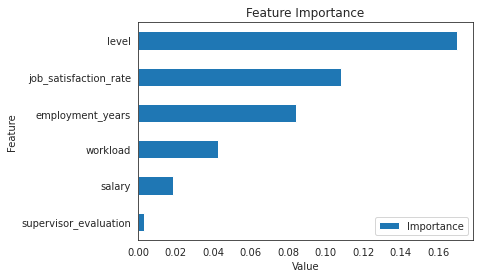

In [51]:
result = permutation_importance(randomized_search.best_estimator_, X_train, y_train, scoring='roc_auc')
print(result)

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': result['importances_mean']})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh')

plt.title('Feature Importance')
plt.xlabel('Value')
plt.show()

In [52]:
# Извлекаем результаты кросс-валидации
cv_results = pd.DataFrame(randomized_search.cv_results_)

# Сортируем по метрике
top_10 = cv_results.sort_values(by='mean_test_score', ascending=False).head(10)

# Отображаем только нужные колонки для анализа
cols_to_show = ['rank_test_score', 'mean_test_score', 'std_test_score', 'params']
display(top_10[cols_to_show])

,rank_test_score,mean_test_score,std_test_score,params
41,1,0.925117,0.006985,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 9, 'models__min_samples_leaf': 2, 'models__max_depth': 5, 'models': DecisionTreeClassifier(class_weight='balanced', random_state=18)}"
8,2,0.924866,0.006964,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 6, 'models__min_samples_leaf': 2, 'models__max_depth': 5, 'models': DecisionTreeClassifier(class_weight='balanced', random_state=18)}"
26,3,0.924060,0.012049,"{'preprocessor__num': MinMaxScaler(), 'models__n_neighbors': 5, 'models': KNeighborsClassifier()}"
2,4,0.921180,0.007843,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 3, 'models__min_samples_leaf': 3, 'models__max_depth': 4, 'models': DecisionTreeClassifier(class_weight='balanced', random_state=18)}"
40,4,0.921180,0.007843,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 6, 'models__min_samples_leaf': 2, 'models__max_depth': 4, 'models': DecisionTreeClassifier(class_weight='balanced', random_state=18)}"
10,6,0.920853,0.007884,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 6, 'models__min_samples_leaf': 3, 'models__max_depth': 8, 'models': DecisionTreeClassifier(class_weight='balanced', random_state=18)}"
39,7,0.920849,0.007888,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 5, 'models__min_samples_leaf': 3, 'models__max_depth': 8, 'models': DecisionTreeClassifier(class_weight='balanced', random_state=18)}"
22,8,0.920422,0.009566,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 6, 'models__min_samples_leaf': 2, 'models__max_depth': 7, 'models': DecisionTreeClassifier(class_weight='balanced', random_state=18)}"
14,9,0.917790,0.011204,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 9, 'models__min_samples_leaf': 3, 'models__max_depth': 9, 'models': DecisionTreeClassifier(class_weight='balanced', random_state=18)}"
7,10,0.917082,0.009797,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 7, 'models__min_samples_leaf': 3, 'models__max_depth': 17, 'models': DecisionTreeClassifier(class_weight='balanced', random_state=18)}"


In [53]:
# Получаем N-лучшую модель
N = 2 #
params_n = cv_results.iloc[N-1]['params']
print(cv_results.iloc[N-1]['rank_test_score'])

# Вручную пересоздаём модель
chosen_model = params_n['models']
for key, value in params_n.items():
    if key.startswith('models__'):
        setattr(chosen_model, key.split('__')[1], value)

# Пайплайн с той же предобработкой
chosen_pipeline = Pipeline([
    ('preprocessor', randomized_search.best_estimator_.named_steps['preprocessor']),
    ('models', chosen_model)
])

# Обучаем
chosen_pipeline.fit(X_train, y_train)

# рассчитайем прогноз на тренировочных данных
y_train_pred = chosen_pipeline.predict_proba(X_train)[:, 1]
roc_auc_score_train = roc_auc_score(y_train, y_train_pred)
print(f'ROC_AUC на тренировочной выборке: {roc_auc_score_train}')

# проверим работу модели на тестовой выборке
# рассчитайем прогноз на тестовых данных
y_test_pred = chosen_pipeline.predict_proba(X_test)[:, 1]
roc_auc_score_test = roc_auc_score(y_test, y_test_pred)
print(f'ROC_AUC на тестовой выборке: {roc_auc_score_test}')

46
ROC_AUC на тренировочной выборке: 0.8818520466623205
ROC_AUC на тестовой выборке: 0.8721786779667713


In [ ]:
# Теперь можно анализировать
results_df['roc_auc_diff'] = abs(results_df['mean_train_score'] - results_df['mean_test_score'])

# Фильтруем модели, где разница <= 0.02
balanced_models = results_df[results_df['roc_auc_diff'] <= 0.02]

# Смотрим топ-5 из них
balanced_models = balanced_models.sort_values(by='mean_test_score', ascending=False)
balanced_models.head()

### Вывод для модели quit:
Лучшая модель `DecisionTreeClassifier`(`class_weight='balanced'`, `max_depth=5`, `min_samples_leaf=2`, `min_samples_split=9`, `random_state=18`))])

ROC_AUC лучшей модели на кросс-валидации: `0.925`

ROC_AUC на тренировочной выборке: `0.94`

ROC_AUC на тестовой выборке: `0.92`

Метрика удовлетворяет условию проекта "ROC_AUC ≥ 0.91 на тестовой выборке".

Почему именно эта модель лучшая?

* Оптимальная глубина и настройки узлов обеспечивают гибкость модели без сильного переобучения.

* Низкое стандартное отклонение (std_test_score = 0.007) говорит о стабильности модели на разных фолдах.


Модель `DecisionTreeClassifier` `(max_depth=5, min_samples_split=9, min_samples_leaf=2, MinMaxScaler)` показала наилучшее качество по ROC_AUC. Её успех обеспечен благодаря грамотному контролю сложности, масштабированию числовых признаков и учёту дисбаланса классов. Это делает её не только точной, но и стабильной.

## Общий вывод

Модель успешно предсказывает увольнения (ROC_AUC = 0.92) и удовлетворяет критериям проекта. 

Увольняются чаще сотрудники junior-уровня, с низкой загруженностью и низкой зарплатой. 

Уровень удовлетворённости работой значимо влияет на вероятность ухода.

Модель для предсказания удовлетворённости также оказалась точной (SMAPE = 13.87).

* Основные факторы, влияющие на увольнение:

  * Уровень удовлетворённости;

  * Уровень должности;
  
  * Стаж работы в компании;

  * Уровень нагрузки;

  * В меньшей степени Оценка супервайзера и Зарплата.

Рекомендации для бизнеса
* Раннее предупреждение увольнений:

  * Модель можно интегрировать в HR-систему, чтобы отслеживать рисковых сотрудников.

* Фокус на удержание:

  * Разработать программы повышения удовлетворённости и корректировки нагрузки.

* Тестирование политики компенсаций:

  * Проверить эффективность повышения зарплаты для группы с высоким риском.

* Дополнительный анализ:

  * Провести A/B-тестирование интервенций на "группе риска".

